<a href="https://colab.research.google.com/github/jhamandeep/Neural/blob/main/Classification_with_Neural_Networks..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

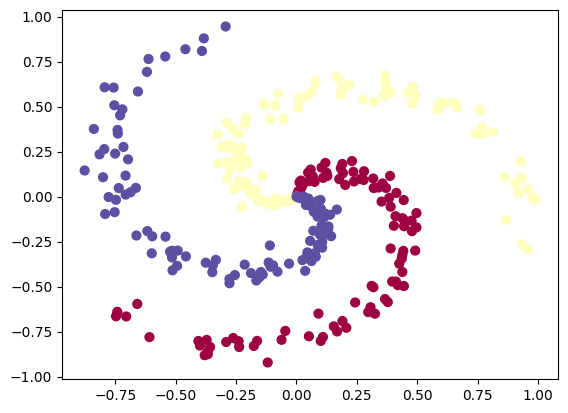

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
X = X.T
Y = y.reshape(1, -1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (2, 300)
Shape of Y: (1, 300)


In [7]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(3) # consistent random numbers

    # Layer 1 (Hidden): Connects Input (n_x) to Hidden (n_h)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    # Layer 2 (Output): Connects Hidden (n_h) to Output (n_y)
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [16]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The softmax output
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Layer 1: Input to Hidden
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    # Layer 2: Hidden to Output
    Z2 = np.dot(W2, A1) + b2   # <--- Updated to use A1
    A2 = softmax(Z2)           # <--- Uses your helper function

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

In [18]:
def compute_cost(A2, Y):
    m = Y.shape[1]

    # 1. Calculate log probabilities for the correct classes
    logprobs = np.log(A2[Y[0], np.arange(m)])

    # 2. Compute the average cost
    cost = -np.sum(logprobs) / m

    cost = float(np.squeeze(cost))  # Makes sure cost is a number, not an array

    return cost

In [31]:
n_x = X.shape[0]
n_h = 4 # You can try different values for this
n_y = K # K is the number of classes defined earlier

parameters = initialize_parameters(n_x, n_h, n_y)

# 1. Forward Propagation
A2, cache = forward_propagation(X, parameters)

# 2. Compute Cost


print("Cost =", cost)

Cost = 1.0986249772223424


In [23]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    # Retrieve necessary variables
    A1 = cache["A1"]
    A2 = cache["A2"]
    W2 = parameters["W2"]

    # 1. Output Layer Error
    # Convert Y to one-hot to match A2's shape
    Y_one_hot = np.zeros((3, m))
    Y_one_hot[Y, np.arange(m)] = 1

    dZ2 = A2 - Y_one_hot

    # 2. Output Layer Gradients
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # 3. Hidden Layer Error
    # We use '*' for element-wise multiplication of the tanh derivative
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))

    # 4. Hidden Layer Gradients
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [24]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of backward_propagation

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [25]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = X.shape[0] # Size of input layer
    n_y = 3          # Size of output layer (3 classes for spiral data)

    # 1. Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # 2. Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward Propagation
        A2, cache = forward_propagation(X, parameters)

        # Cost function
        cost = compute_cost(A2, Y)

        # Backward Propagation
        grads = backward_propagation(parameters, cache, X, Y)

        # Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate=1.2)

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [35]:
parameters = nn_model(X, Y, n_h=4, num_iterations=70000, print_cost=True)

Cost after iteration 0: 1.098625
Cost after iteration 1000: 0.195395
Cost after iteration 2000: 0.170290
Cost after iteration 3000: 0.161565
Cost after iteration 4000: 0.156405
Cost after iteration 5000: 0.152782
Cost after iteration 6000: 0.149998
Cost after iteration 7000: 0.147690
Cost after iteration 8000: 0.145641
Cost after iteration 9000: 0.143869
Cost after iteration 10000: 0.142326
Cost after iteration 11000: 0.140992
Cost after iteration 12000: 0.139821
Cost after iteration 13000: 0.138780
Cost after iteration 14000: 0.137843
Cost after iteration 15000: 0.136993
Cost after iteration 16000: 0.136214
Cost after iteration 17000: 0.135496
Cost after iteration 18000: 0.134831
Cost after iteration 19000: 0.134211
Cost after iteration 20000: 0.133631
Cost after iteration 21000: 0.133086
Cost after iteration 22000: 0.132573
Cost after iteration 23000: 0.132088
Cost after iteration 24000: 0.131628
Cost after iteration 25000: 0.131191
Cost after iteration 26000: 0.130776
Cost after ite

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

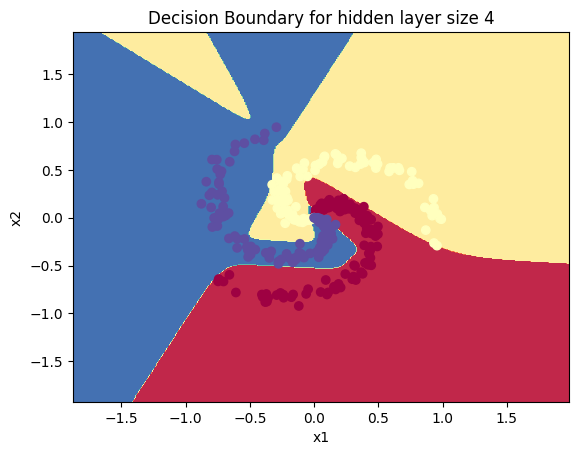

In [36]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation
    A2, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A2, axis=0)

    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and add the examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten()) # Flatten Y for plotting
plt.title("Decision Boundary for hidden layer size " + str(4))